<a href="https://colab.research.google.com/github/fatemakotha/1800-Data-Visualization/blob/main/Lab_6/Lab_06_Exploration_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploration B**
##**Once again the second exploration looks at the Iris dataset (see Tutorial 04 for more details).**
##**This week you will look comparing the data across the 4 different dimensions (i.e. the measurements).**

#**1. As last week, the data in this dataset has no obvious index column (recall that an index column usually has a unique identifier in each row). So first read the data in and check it is in the right format – there should be 5 columns (4 for the measurements and 1 for the variety) and 150 rows.**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("https://tinyurl.com/ChrisCoDV/iris.csv")
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


#######################################################################################################

#**2. Next create a summary dataframe. To do this first create an empty dataframe summary_data = pd.DataFrame()**

**Next add 3 columns, one for each variety, containing the mean measurements for that variety. Here is the code for Setosa variety:**

**summary_data['Setosa'] = data[data['variety'] == 'Setosa'].mean()**

**This will create a summary dataframe with 3 columns (one for each variety) **and 4 rows (one for each**
**metric). However by analogy with the lecture and the previous exploration it **makes more sense for each**
**metric to have its own column and each row to represent a variety. To achieve**
**this just transpose the**
**dataframe:**
**summary_data = summary_data.transpose()**
**Check it's what you want by printing it out.**

In [5]:
summary_data = pd.DataFrame()
summary_data['Setosa'] = data[data['variety'] == 'Setosa'].mean()
summary_data['Versicolor'] = data[data['variety'] == 'Versicolor'].mean()
summary_data['Virginica'] = data[data['variety'] == 'Virginica'].mean()
summary_data.head()

<ipython-input-5-0f2a6ee870b4>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  summary_data['Setosa'] = data[data['variety'] == 'Setosa'].mean()
<ipython-input-5-0f2a6ee870b4>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  summary_data['Versicolor'] = data[data['variety'] == 'Versicolor'].mean()
<ipython-input-5-0f2a6ee870b4>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  summary_data['Virginica'] = data[data['variety'] == 'Virginica'].mean()


,Setosa,Versicolor,Virginica
sepal.length,5.006,5.936,6.588
sepal.width,3.428,2.770,2.974
petal.length,1.462,4.260,5.552
petal.width,0.246,1.326,2.026


In [10]:
summary_data = summary_data.transpose()
summary_data.head()

,sepal.length,sepal.width,petal.length,petal.width
Setosa,5.006,3.428,1.462,0.246
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


#######################################################################################################



##**3. Next create a visualisation with 3 radar subplots, one for each variety, and with each radar plot showing the mean lengths & widths for that variety.** You can virtually use the code from the lecture example 05 unchanged for this, however:

###• The selected list needs to be a list of the varieties, ['Setosa', 'Versicolor', 'Virginica']

###• The lengths & widths are all more or less the same size. If they are normalised (as in the examples) it actually makes the visualisation harder to understand. Therefore just visualise the unnormalised data, either by modifying the visualisation code or, even easier, just by setting the normalised dataframe to be the same as the unnormalised one, i.e. normalised_data = summary_data

###• If you are not using normalised data, you will need to change the y-axis limit and tick marks to
###something sensible matching the range of values.

###Comment on the radar subplots and what they show.

            sepal.length  sepal.width  petal.length  petal.width
Setosa          0.759866     1.000000      0.263329     0.121422
Versicolor      0.901032     0.808051      0.767291     0.654492
Virginica       1.000000     0.867561      1.000000     1.000000


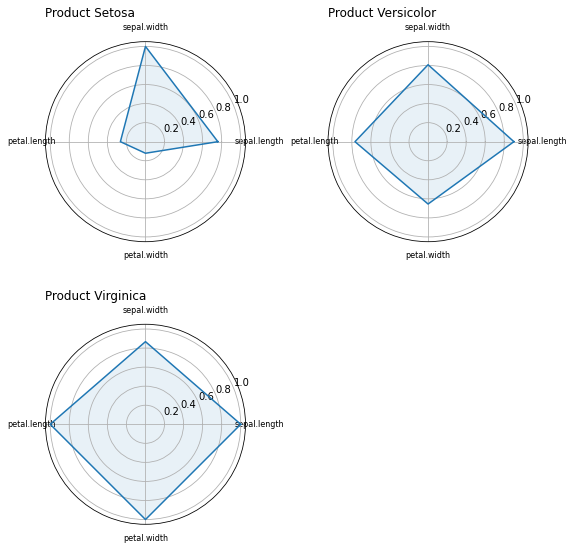

In [12]:
import numpy as np

normalised_data = summary_data / summary_data.max()
print(normalised_data.head())

selected = ['Setosa', 'Versicolor', 'Virginica']

n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
plt.figure(figsize=(8, 8))
counter = 1
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub = plt.subplot(2, 2, counter, polar=True)
    sub.plot(angles, values)
    sub.fill(angles, values, alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns, fontsize=8)
    sub.set_title('Product ' + name, fontsize=12, loc='left')
    counter += 1
plt.tight_layout()
plt.show()

            sepal.length  sepal.width  petal.length  petal.width
Setosa             5.006        3.428         1.462        0.246
Versicolor         5.936        2.770         4.260        1.326
Virginica          6.588        2.974         5.552        2.026


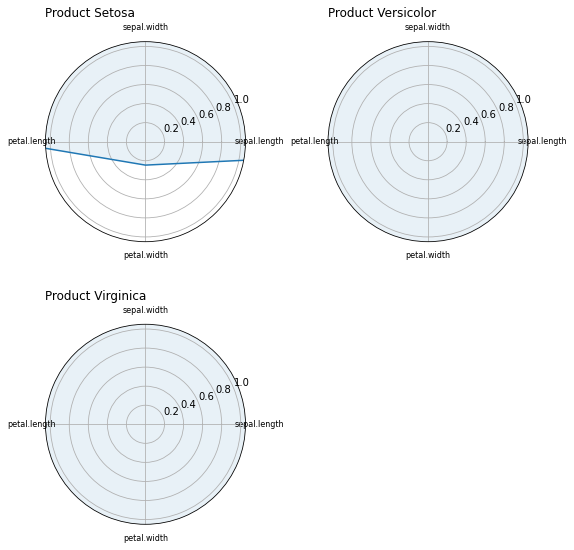

In [14]:
normalised_data = summary_data #NO NORMALIZATION IS TAKING PLACE
print(normalised_data.head())

selected = ['Setosa', 'Versicolor', 'Virginica']

n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
plt.figure(figsize=(8, 8))
counter = 1
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub = plt.subplot(2, 2, counter, polar=True)
    sub.plot(angles, values)
    sub.fill(angles, values, alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns, fontsize=8)
    sub.set_title('Product ' + name, fontsize=12, loc='left')
    counter += 1
plt.tight_layout()
plt.show() #IN HERE THE SHAPES WE ARE GETTING IS TOO BIG FOR THA PLOTS

            sepal.length  sepal.width  petal.length  petal.width
Setosa             5.006        3.428         1.462        0.246
Versicolor         5.936        2.770         4.260        1.326
Virginica          6.588        2.974         5.552        2.026


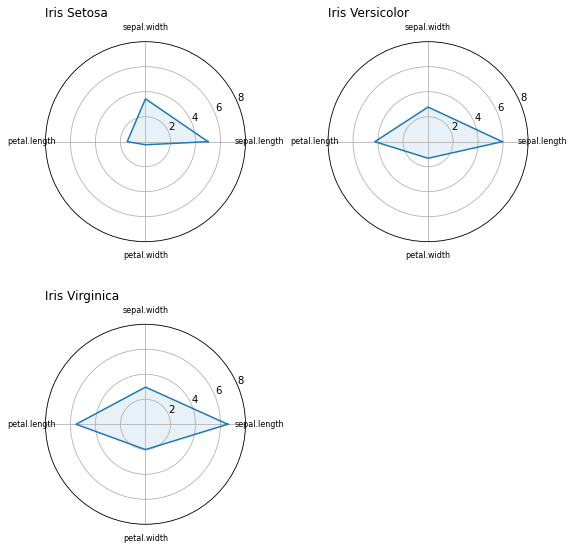

In [18]:
normalised_data = summary_data #NO NORMALIZATION IS TAKING PLACE
print(normalised_data.head())

selected = ['Setosa', 'Versicolor', 'Virginica']

n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
plt.figure(figsize=(8, 8))
counter = 1
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub = plt.subplot(2, 2, counter, polar=True)
    sub.plot(angles, values)
    sub.fill(angles, values, alpha=0.1)
    sub.set_ylim(ymax=8)
    sub.set_yticks([2, 4, 6, 8]) #YTICKS HAVE BEEN CHANGED
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns, fontsize=8)
    sub.set_title('Iris ' + name, fontsize=12, loc='left')
    counter += 1
plt.tight_layout()
plt.show() #IN HERE THE SHAPES WE ARE GETTING IS TOO BIG FOR THA PLOTS

In [19]:
#VERSICOLOR AND VIRGINICA ARE SIMILAR IN PETAL WIDTH AND PETAL LENGTH

#######################################################################################################


#**4. In fact it might be easier to use a comparative bar chart to compare these metrics.You can use the code from the lecture example almost unchanged. Once again, don't normalise the data and adapt the y-axis tick marks and legend labels).Comment on whether you think the radar subplots or the comparative bar chart is easier to interpret. [Note: there is no right answer.]**

[0 1 2 3]
--------------------------------------------------------
[5.006, 3.428, 1.4620000000000002, 0.24599999999999997]
[0.0, 1.0, 2.0, 3.0]
--------------------------------------------------------
[5.936, 2.7700000000000005, 4.26, 1.3259999999999998]
[0.26666666666666666, 1.2666666666666666, 2.2666666666666666, 3.2666666666666666]
--------------------------------------------------------
[6.587999999999998, 2.974, 5.5520000000000005, 2.0260000000000002]
[0.5333333333333333, 1.5333333333333332, 2.533333333333333, 3.533333333333333]
--------------------------------------------------------


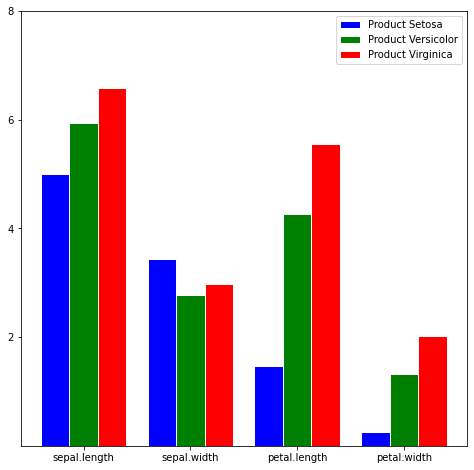

In [27]:
selected = ['Setosa', 'Versicolor', 'Virginica']
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

plt.figure(figsize=(8, 8))
c = 0
n_bars = len(selected)
x_pos_base = np.arange(len(summary_data.columns))
print(x_pos_base)
print("--------------------------------------------------------")
bar_width = 0.8 / n_bars
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    print(values)
    x_pos = [x + (bar_width * c) for x in x_pos_base]
    print(x_pos)
    plt.bar(x_pos, values, color=colours[c % len(colours)],
            width=bar_width, edgecolor='white', label='Product ' + name)
    c += 1
    print("--------------------------------------------------------")

plt.yticks([2, 4, 6 ,8])
x_pos = [x + (bar_width * (c - 1) / 2) for x in x_pos_base]
plt.xticks(x_pos, summary_data.columns)
plt.legend()
plt.show()